# Follow Steps
    1. Getting and setting up the data.
    2. Visualizing current data.
    3. The mathematics behind the Least Squares Method.
    4. Using Numpy for a Univariate Linear Regression.
    5. Getting the error.
    6. Using scikit learn to implement a multivariate regression.
    7. Using Training and Validation.  
    8. Predicting Prices
    9.Residual Plots

In [5]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [6]:
# load example dataset
from sklearn.datasets import load_boston


In [2]:
boston= load_boston()
print boston.DESCR
# Custom made DESCR method for boston dataset

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

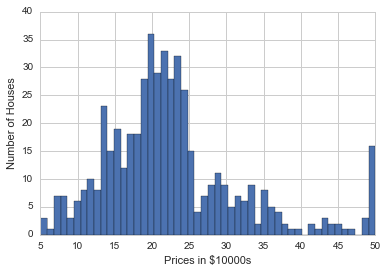

In [7]:
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in $10000s')
plt.ylabel('Number of Houses')


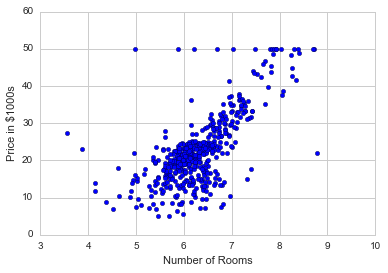

In [8]:
# scatter plot one features vs the target
# number of rooms per dwelling

# grabbing the 5th column only
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('Number of Rooms')
plt.ylabel('Price in $1000s')


In [9]:
# this is positive corelation more rooms = more price


In [10]:
boston_df  = DataFrame(boston.data)
boston_df.columns = boston.feature_names #set column name from the boston data to pandas dframe
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [11]:
# add target
boston_df['Price']= boston.target

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


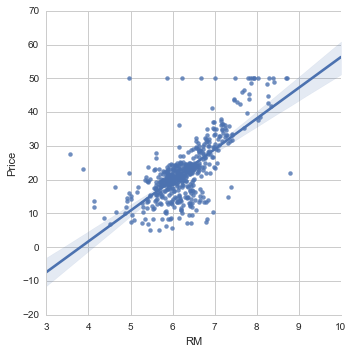

In [13]:
# llinear fit linear regression
sns.lmplot('RM','Price',data= boston_df)

# Step 4: 
Numpy univariate

In [14]:
x = boston_df.RM

In [29]:
x.shape

(506,)

In [30]:
X = np.vstack(boston_df.RM)

In [31]:
X.shape

(506, 1)

In [32]:
X

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [33]:
Y = boston_df.Price

In [34]:
Y.shape

(506,)

In [ ]:
# need to build of the X as [X 1]  to  solve with matrix eqn, 

In [35]:
X = np.array([[value,1] for value in X])

In [36]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [37]:
m,b = np.linalg.lstsq(X,Y)[0] # take ONLY FIRST INDEX and use listsquare

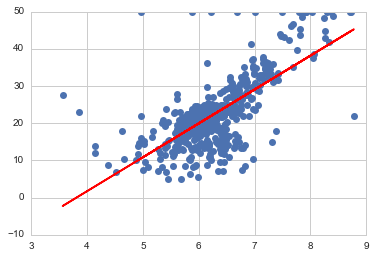

In [38]:
plt.plot(boston_df.RM,boston_df.Price,'o')  #scatterplot
# plot best fit line
x = boston_df.RM
plt.plot(x,m*x + b,'r',label = 'Best Fit Line')


In [39]:
# this is equal to sns lmplot

#  Step 5: Get The Error

In [42]:
result = np.linalg.lstsq(X,Y)
error_total = result[1]
rmse = np.sqrt(error_total/len(X))
print 'The Root Mean Square Error was %.2f'%rmse

The Root Mean Square Error was 6.60


68–95–99.7 rule

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

In [45]:
from sklearn.linear_model import LinearRegression 
import sklearn
# is an estimator

Fit

Predict 

Score

In [47]:
lreg = LinearRegression()

In [48]:
# multi variable analysis


In [49]:
X_multi = boston_df.drop('Price',1)
Y_targe = boston_df.Price

In [50]:
lreg.fit(X_multi,Y_targe)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print 'The estimated intercept coefficient is  %.2f '%lreg.intercept_
print 'The number of coefficients used was %d '%len(lreg.coef_)

The estimated intercept coefficient is  36.49 
The number of coefficients used was 13 


In [53]:
coef_df =DataFrame(boston_df.columns)

In [54]:
coef_df.columns =['Features'] 

In [55]:
coef_df['Coefficient Estimate'] = pd.Series(lreg.coef_)
coef_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


# Predicting prices and training and validate dataset

In [56]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [57]:
X_train, X_test, Y_train,Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

In [58]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379, 2) (127, 2) (379,) (127,)


In [59]:
# predict house price
lreg = LinearRegression()

In [60]:
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
# run prediction 
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [62]:
# take the mean square error

In [69]:
print 'Fit a model X_train and calcualte the Mean Squared Error with Y_train: %.2f '% np.mean((Y_train-pred_train)**2)
print 'Fit a model X_train and calculate the MSE with X_test and Y_test: %.2f '% np.mean((Y_test-pred_test)**2)

Fit a model X_train and calcualte the Mean Squared Error with Y_train: 37.64 
Fit a model X_train and calculate the MSE with X_test and Y_test: 62.02 


# Residual Plot

Residual = observed value - Predicted Value

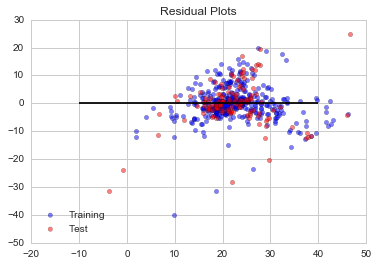

In [73]:
train = plt.scatter(pred_train,(pred_train - Y_train), c='b', alpha =0.5)
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=40)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')